In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import csv
import json
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataJSON  = []
with open("/content/drive/MyDrive/APT/Datasets/df_word2vec_with_numbers.json", 'r') as f:
  dataJSON=json.load(f)
  df_word2vec_with_numbers = pd.DataFrame(dataJSON)

dataJSON  = []
with open("/content/drive/MyDrive/APT/Datasets/df_word2vec_without_all_tokens_with_numbers.json", 'r') as f:
  dataJSON=json.load(f)
  df_word2vec_without_all_tokens_with_numbers = pd.DataFrame(dataJSON)

dataJSON  = []
with open("/content/drive/MyDrive/APT/Datasets/df_word2vec_without_numbers_partially.json", 'r') as f:
  dataJSON=json.load(f)
  df_word2vec_without_numbers_partially = pd.DataFrame(dataJSON)

dataJSON  = []
with open("/content/drive/MyDrive/APT/Datasets/df_fasttext_with_numbers.json", 'r') as f:
  dataJSON=json.load(f)
  df_fasttext_with_numbers = pd.DataFrame(dataJSON)

dataJSON  = []
with open("/content/drive/MyDrive/APT/Datasets/df_fasttext_without_all_tokens_with_numbers.json", 'r') as f:
  dataJSON=json.load(f)
  df_fasttext_without_all_tokens_with_numbers = pd.DataFrame(dataJSON)

dataJSON  = []
with open("/content/drive/MyDrive/APT/Datasets/df_fasttext_without_numbers_partially.json", 'r') as f:
  dataJSON=json.load(f)
  df_fasttext_without_numbers_partially = pd.DataFrame(dataJSON)

In [ ]:
#df = df_word2vec_with_numbers
#df = df_word2vec_without_all_tokens_with_numbers
#df = df_word2vec_without_numbers_partially
#df = df_fasttext_with_numbers
#df = df_fasttext_without_all_tokens_with_numbers
df = df_fasttext_without_numbers_partially

In [ ]:
#konkateniraj vektore u jedan zajednicki

df["allVectors"] = df["query_vector"] + df["product_vector"] 

In [ ]:
print(df["allVectors"].head(1))

0    [-0.067871094, 0.122558594, -0.17480469, 0.086...
Name: allVectors, dtype: object


In [ ]:
df['allVectors']=df['allVectors'].apply(lambda x : np.asarray(x,np.float))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
df['median_relevance'] = df['median_relevance'] /df['median_relevance'].abs().max() #sve vrijednosti izmedu 0.25 i 1.00

In [ ]:
print(df.head(5))

   id                                       query_vector  \
0   1  [-0.067871094, 0.122558594, -0.17480469, 0.086...   
1   2  [-0.0040283203, 0.15348308, 0.019042969, -0.11...   
2   4  [0.23632812, -0.040527344, -0.05078125, 0.0478...   
3   5  [-0.13476562, 0.026855469, -0.24902344, 0.1118...   
4   7  [-0.005859375, 0.23632812, 0.16137695, -0.0783...   

                                      product_vector  median_relevance  \
0  [0.010758463, 0.015542602, 0.008837891, 0.0595...              0.25   
1  [-0.027775712, 0.10037037, 0.040850554, -0.007...              1.00   
2  [0.15576172, -0.030273438, -0.16113281, -0.006...              1.00   
3  [0.007836914, 0.09597798, -0.07133923, 0.03092...              1.00   
4  [-0.029772883, 0.10301524, 0.021087646, 0.0199...              0.50   

   relevance_variance                                         allVectors  
0               0.000  [-0.067871094, 0.122558594, -0.17480469, 0.086...  
1               0.000  [-0.0040283203, 0.153

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['allVectors'], df['median_relevance'],test_size=0.4, random_state=42) 

X_test, X_val, y_test, y_val  = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
X_tr_ind=X_train.index.to_numpy()
X_tst_ind=X_test.index.to_numpy()
X_val_ind=X_val.index.to_numpy()

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
y_val = y_val.to_numpy()

In [ ]:
X_test=np.vstack(X_test)
X_train=np.vstack(X_train)
X_val=np.vstack(X_val)

In [ ]:
X_train.shape

(6094, 600)

In [ ]:
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras.models import load_model

In [ ]:
network=K.Sequential([
    K.layers.InputLayer(600),
    K.layers.BatchNormalization(),
    K.layers.Dropout(0.25),
    K.layers.Dense(1000,activation='relu'),
    K.layers.BatchNormalization(),
    K.layers.Dropout(0.25),
    K.layers.Dense(200,activation='relu'),
    K.layers.BatchNormalization(),
    K.layers.Dropout(0.25),
    K.layers.Dense(100, activation='relu'),
    K.layers.BatchNormalization(),
    K.layers.Dropout(0.25),
    K.layers.Dense(1, activation='relu')])

In [ ]:
network.compile(loss=tf.keras.losses.huber, optimizer='adam', metrics=['mse']) #tf.keras.losses.SparseCategoricalCrossentropy()

In [ ]:
network.summary()

In [ ]:
network.fit(X_train,y_train,epochs=300,batch_size=2048, validation_data=(X_val,y_val))

Epoch 1/300
3/3 [==============================] - 3s 427ms/step - loss: 0.3772 - mse: 0.8749 - val_loss: 0.3722 - val_mse: 0.7444
Epoch 2/300
3/3 [==============================] - 1s 322ms/step - loss: 0.3151 - mse: 0.6815 - val_loss: 0.3725 - val_mse: 0.7450
Epoch 3/300
3/3 [==============================] - 1s 349ms/step - loss: 0.2833 - mse: 0.5873 - val_loss: 0.3701 - val_mse: 0.7401
Epoch 4/300
3/3 [==============================] - 1s 341ms/step - loss: 0.2679 - mse: 0.5465 - val_loss: 0.3598 - val_mse: 0.7196
Epoch 5/300
3/3 [==============================] - 1s 322ms/step - loss: 0.2538 - mse: 0.5181 - val_loss: 0.3330 - val_mse: 0.6659
Epoch 6/300
3/3 [==============================] - 1s 322ms/step - loss: 0.2421 - mse: 0.4904 - val_loss: 0.2903 - val_mse: 0.5807
Epoch 7/300
3/3 [==============================] - 1s 319ms/step - loss: 0.2330 - mse: 0.4721 - val_loss: 0.2492 - val_mse: 0.4983
Epoch 8/300
3/3 [==============================] - 1s 337ms/step - loss: 0.2208 - m

In [ ]:
network.evaluate(X_test,y_test)

64/64 [==============================] - 0s 4ms/step - loss: 0.0213 - mse: 0.0427


[0.021329661831259727, 0.042659323662519455]

In [ ]:
preds = network.predict(X_test)

In [ ]:
preds = np.array([i*4 for i in preds])
y_test = np.array([int(i*4) for i in y_test])

In [ ]:
print(y_test[:10])

[3 4 2 3 4 1 2 4 3 4]


In [ ]:
print(preds[:20])

[[3.4869978]
 [3.6089354]
 [2.6799746]
 [1.9972954]
 [3.7932177]
 [1.4518068]
 [3.9775317]
 [3.9394073]
 [3.4723468]
 [4.0506706]
 [3.8253536]
 [3.47089  ]
 [3.763318 ]
 [3.3020566]
 [2.916606 ]
 [3.1425915]
 [3.8987842]
 [1.4672872]
 [4.0734124]
 [3.1484275]]


In [ ]:
def accuracy(real, pred):
  pred=[round(x[0]) for x in pred]
  pred=[1 if x<1 else x for x in pred]
  pred=[4 if x>4 else x for x in pred]
  print(np.array(pred[:50]))
  s=np.sum(pred == real)
  return s/len(pred)

In [ ]:
print(accuracy(y_test, preds))

print(y_test[:50])

[3 4 3 2 4 1 4 4 3 4 4 3 4 3 3 3 4 1 4 3 2 4 4 4 3 4 2 3 4 4 4 3 3 4 4 4 4
 4 4 3 4 4 3 3 4 2 3 4 3 2]
0.6171259842519685
[3 4 2 3 4 1 2 4 3 4 4 4 4 2 4 4 4 1 4 4 2 4 4 4 2 3 1 4 3 2 4 3 2 4 4 4 4
 4 4 1 3 4 2 3 4 3 2 4 4 2]


In [ ]:
#network.save('/content/drive/MyDrive/APT/Models/word2vec_with_numbers') 
#network.save('/content/drive/MyDrive/APT/Models/word2vec_without_all_tokens_with_numbers') 
#network.save('/content/drive/MyDrive/APT/Models/word2vec_without_numbers_partially') 
#network.save('/content/drive/MyDrive/APT/Models/fasttext_with_numbers') 
#network.save('/content/drive/MyDrive/APT/Models/fasttext_without_all_tokens_with_numbers') 
#network.save('/content/drive/MyDrive/APT/Models/fasttext_without_numbers_partially') 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/APT/Models/word2vec_without_numbers_partially/assets


In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/APT/Models/fasttext_without_numbers_partially')

In [ ]:
new_model.evaluate(X_test,y_test)

64/64 [==============================] - 0s 5ms/step - loss: 0.0220 - mse: 0.0439


[0.021969186142086983, 0.043938372284173965]

In [ ]:
preds = new_model.predict(X_test)

In [ ]:
preds = np.array([i*4 for i in preds])
y_test = np.array([i*4 for i in y_test])

In [ ]:
print(preds[:10])
print(y_test[:10])

[[3.5647788]
 [2.8660789]
 [2.9645488]
 [1.659944 ]
 [3.7520533]
 [1.1688416]
 [3.7652392]
 [3.9844708]
 [3.577681 ]
 [3.915019 ]]
[3. 4. 2. 3. 4. 1. 2. 4. 3. 4.]


In [ ]:
mean_squared_error(y_test,preds)

0.7030138617969074

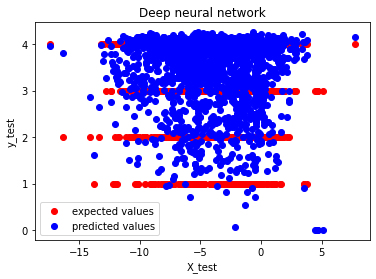

In [ ]:
plt.scatter(np.sum(X_test, axis=1), y_test, color = 'red', label='expected values')
plt.scatter(np.sum(X_test, axis=1), new_model.predict(X_test)*4, color = 'blue', label='predicted values')
plt.title('Deep neural network')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.legend(loc="best")
plt.savefig('/content/drive/MyDrive/APT/Models/graph_NN.jpg', bbox_inches='tight')
plt.show()